1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering
4. Discussion of the findings

    Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# setting path variable as root
path = r'C:\Users\shrut\Downloads\Task_data_analytics\Exploratory_Project' 

In [9]:
# defining dataframe using already cleaned and prepared data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'US_Housing_Data_Cleaned.csv')) 

In [10]:
df.head()

,Unnamed: 0,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046,40.72001,-74.00472
1,2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880,40.73407,-74.00601
2,3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880,40.73407,-74.00601
3,4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880,40.73407,-74.00601
4,5,10017,764900.0,1,1,643,145 E 48TH ST APT 11E,New York,New York,15514,20107.7,New York,188289,40.75235,-73.97260


In [11]:
# create a subset of df with numeric values only
sub = df[['Price','Zip Code Population', 'Zip Code Density', 'Median Household Income']]

In [12]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [13]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
                                                                    # a rate of variation for the given cluster option.

score

C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-3.5548946712467132e+16,
 -1.9044370383292216e+16,
 -1.037218640894158e+16,
 -6271644170347343.0,
 -4203123715385282.5,
 -3081459668281025.0,
 -2340040418823304.0,
 -1865803607614613.0,
 -1491287412715522.5]

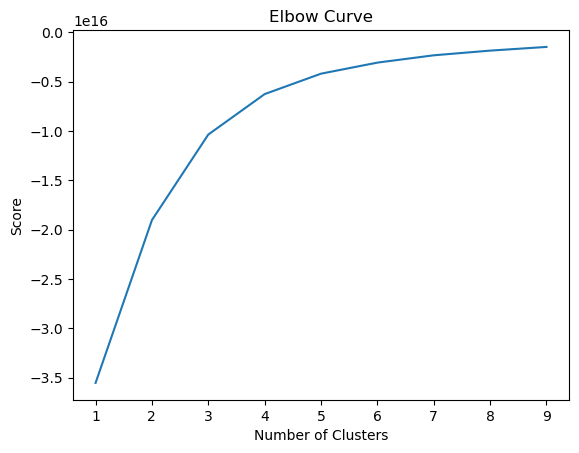

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Since I could see the flattening of curve at 4, I take number of cluster as 4

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [16]:
# Fit the k-means object to the data.

kmeans.fit(sub)

C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [17]:
# Perform clustering using the k-means model and assign the results to new 'clusters' column

sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shrut\AppData\Local\Temp\ipykernel_6580\1587882893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [18]:
sub.head()

,Price,Zip Code Population,Zip Code Density,Median Household Income,clusters
0,3999000.0,29563,20967.9,370046,1
1,1650000.0,29815,23740.9,249880,3
2,760000.0,29815,23740.9,249880,0
3,1100000.0,29815,23740.9,249880,3
4,764900.0,15514,20107.7,188289,0


In [19]:
# Check the frequency of each unique value in the 'clusters' column

sub['clusters'].value_counts()

clusters
0    34365
3     4248
1      375
2       31
Name: count, dtype: int64

Scatter Plots

C:\Users\shrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


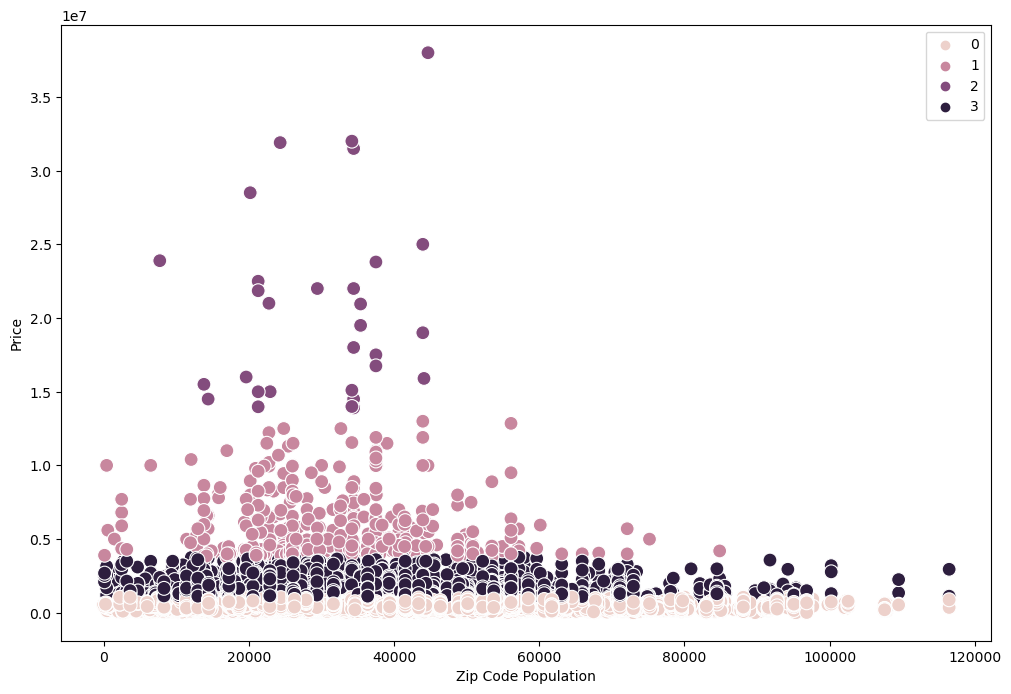

In [20]:
# Plot the clusters for the "Zip Code Population" and "Price" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['Zip Code Population'], y = sub['Price'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Zip Code Population')
plt.ylabel('Price')
plt.show()

Insights:
From the above scatterplot of clusters, we can infer that:
1. For prices above 1.25 million, the zip code population is not more than 45000 (Legend indicator 2)
2. For prices above 0.45 million, the zip code population is mostly upto 85000(Legend indicator 1)

C:\Users\shrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


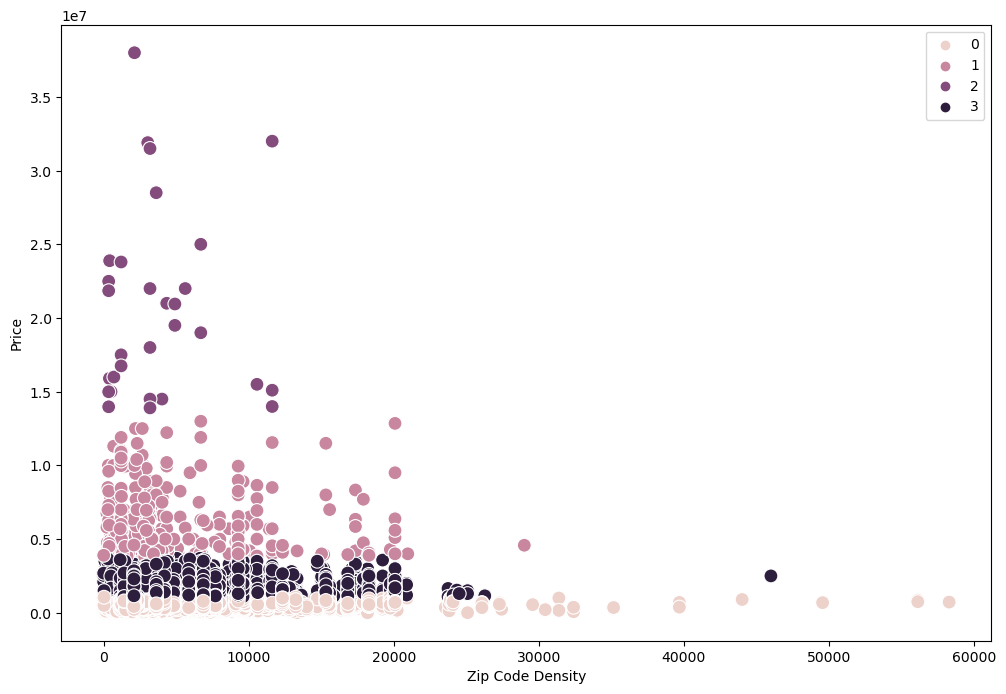

In [22]:
# Plot the clusters for the "Zip Code Density" and "Price" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['Zip Code Density'], y = sub['Price'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Zip Code Density')
plt.ylabel('Price')
plt.show()

Insights:
Price till 0.25 million is applicable when the zip code density is above 46000 persons. 
For the price range from 1.25 million and above the zip code density is near to 10000 persons.
A medium price range of 0.4 to 1.25 million is within the range of density 20000 with an exception at 30000(probably an outlier)

C:\Users\shrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


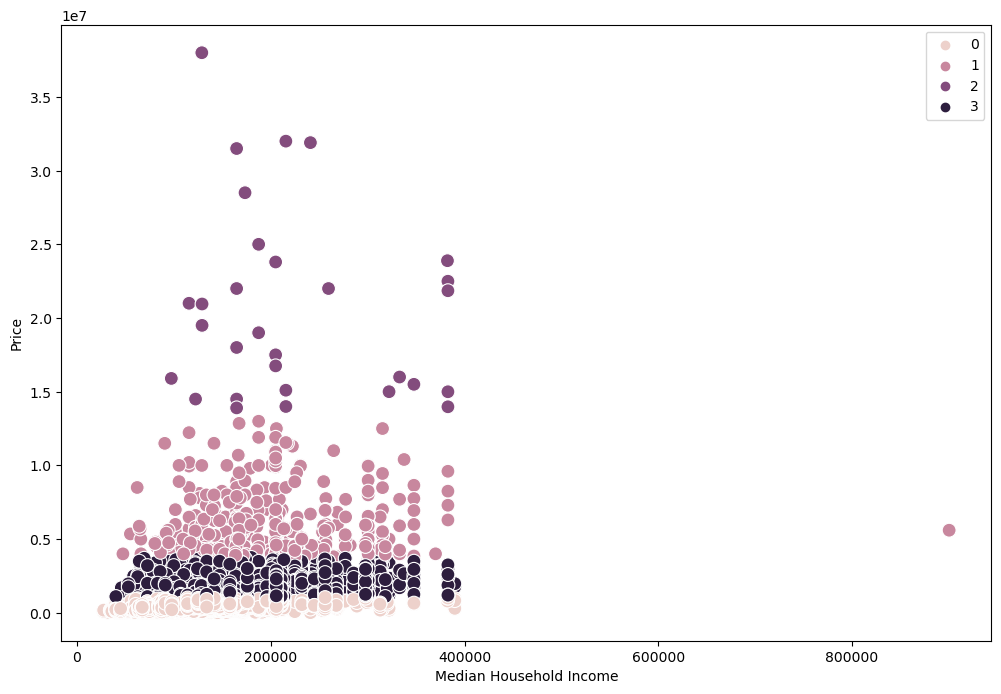

In [21]:
# Plot the clusters for the "Median Household Income" and "Price" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['Median Household Income'], y = sub['Price'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Median Household Income')
plt.ylabel('Price')
plt.show()

    # There is not much relationship we could see between the two variables. It is an overall distribution till an income of 400000 and only one above 800000(probably an outlier)

In [23]:
sub.loc[sub['clusters'] == 3, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'dark pink'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\shrut\AppData\Local\Temp\ipykernel_6580\2771687210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 3, 'cluster'] = 'dark purple'
C:\Users\shrut\AppData\Local\Temp\ipykernel_6580\2771687210.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sub.loc[sub['clusters'] == 3, 'cluster'] = 'dark purple'


In [24]:
sub.groupby('cluster').agg({'Price':['mean', 'median'], 
                         'Zip Code Population':['mean', 'median'], 
                         'Zip Code Density':['mean', 'median'],
                          'Median Household Income':['mean', 'median']})

Price             Zip Code Population           \
                     mean      median                mean   median   
cluster                                                              
dark pink    5.842854e+06   4995000.0        31879.202667  31154.0   
dark purple  1.721742e+06   1500000.0        36078.515066  33853.0   
pink         4.107967e+05    365000.0        37968.001921  35199.0   
purple       2.059623e+07  19490000.0        30015.838710  34193.0   

            Zip Code Density         Median Household Income            
                        mean  median                    mean    median  
cluster                                                                 
dark pink        4288.847467  2661.8           195476.544000  185551.0  
dark purple      3847.051977  2661.8           164072.193503  156095.0  
pink             2162.441662  1497.4           103174.474407   95441.0  
purple           3848.283871  3194.2           222625.516129  204979.0

    # Dark pink has most of the values with an optimum price for an optimum income.
      Purple has high price and interestingly high income compared to other groups. The mean zip code population is also less  
      for purple.
      Pink cluster has highest mean zip code population and has low price for house.

    # How the results could be useful for in future steps of an analytics pipeline?
    The inconsistency within clusters can be used for anomaly detection. If some data points within a cluster significantly  
    deviate from the cluster's mean or median, it could signal unusual cases that require further investigation. This can prompt 
    additional analysis and  new hypothesis. The findings can help better understand the characteristics of each cluster. 

In [26]:
# Export the dataframe to csv file

sub.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clusters.csv'))